In [1]:
import requests
# IBM公司的股票代码
stock_code = "IBM"
# 构造完整的获取股票历史信息的网页URL
url = 'https://finance.yahoo.com/quote/%s/history?p=%s' % (stock_code, stock_code)
# 获取上述URL对应的网页
r = requests.get(url)
print(r)

<Response [200]>


In [2]:
import re
# 定义正则表达式，找到所有我们需要的股票历史数据
result = re.findall('"HistoricalPriceStore":{"prices":(.*?),"isPending"', r.text)
# 如果没有找到数据，prices就是None
if result is not None:
    print(result)

['[{"date":1611262801,"open":130.1199951171875,"high":132.24000549316406,"low":130.0500030517578,"close":131.64999389648438,"volume":10924257,"adjclose":131.64999389648438},{"date":1611153000,"open":129.6999969482422,"high":131.05999755859375,"low":128.55999755859375,"close":130.0800018310547,"volume":5598700,"adjclose":130.0800018310547},{"date":1611066600,"open":129.27999877929688,"high":129.58999633789062,"low":128.08999633789062,"close":129.02000427246094,"volume":5398000,"adjclose":129.02000427246094},{"date":1610721000,"open":128.27999877929688,"high":129.24000549316406,"low":127.66999816894531,"close":128.38999938964844,"volume":4902100,"adjclose":128.38999938964844},{"date":1610634600,"open":128.02000427246094,"high":130.16000366210938,"low":127.55000305175781,"close":128.97000122070312,"volume":7503200,"adjclose":128.97000122070312},{"date":1610548200,"open":129.14999389648438,"high":129.75,"low":126.45999908447266,"close":126.91999816894531,"volume":7677700,"adjclose":126.919

In [3]:
# 把需要的股票价格从查找的结果中提取出来
prices = eval(result[0])
prices[1]

{'date': 1611153000,
 'open': 129.6999969482422,
 'high': 131.05999755859375,
 'low': 128.55999755859375,
 'close': 130.0800018310547,
 'volume': 5598700,
 'adjclose': 130.0800018310547}

In [4]:
# 通过肉眼观察，我们可以看到上述结果中有一些比较奇怪的数据，需要进行数据清洗
quotes = [item for item in prices if not 'type' in item]
quotes[1]

{'date': 1611153000,
 'open': 129.6999969482422,
 'high': 131.05999755859375,
 'low': 128.55999755859375,
 'close': 130.0800018310547,
 'volume': 5598700,
 'adjclose': 130.0800018310547}

In [5]:
from datetime import date
# 同时，需要将数据中date字段中的时间戳转换成更加直观的日期格式
list1 = []
for i in range(len(quotes)):
    x = date.fromtimestamp(quotes[i]['date'])
    y = date.strftime(x,'%Y-%m-%d')
    list1.append(y)
list1[1]

'2021-01-20'

In [6]:
import pandas as pd
# 使用pandas模块提供的DataFrame对象存储股票数据，并将刚才的日期作为索引列的值
quotesdf_ori = pd.DataFrame(quotes, index = list1)
quotesdf_ori

,date,open,high,low,close,volume,adjclose
2021-01-22,1611262801,130.119995,132.240005,130.050003,131.649994,10924257,131.649994
2021-01-20,1611153000,129.699997,131.059998,128.559998,130.080002,5598700,130.080002
2021-01-19,1611066600,129.279999,129.589996,128.089996,129.020004,5398000,129.020004
2021-01-15,1610721000,128.279999,129.240005,127.669998,128.389999,4902100,128.389999
2021-01-14,1610634600,128.020004,130.160004,127.550003,128.970001,7503200,128.970001
...,...,...,...,...,...,...,...
2020-01-28,1580221800,139.500000,140.470001,138.750000,139.550003,3451600,132.596146
2020-01-27,1580135400,138.500000,140.070007,138.100006,138.619995,4166600,131.712494
2020-01-24,1579876200,143.389999,143.919998,140.460007,140.559998,5580200,133.555817
2020-01-23,1579789800,144.199997,144.410004,142.149994,142.869995,5657800,135.750717


In [7]:
# 去掉原始数据中的时间戳数据，并按照月份进行分组
quotesdf = quotesdf_ori.drop(['date'], axis = 1)  # axis=1表示从某列中删除，axis=0表示从某行中删除
templist = []
import time
for i in range(len(quotesdf)):
    temp = time.strptime(quotesdf.index[i],"%Y-%m-%d") # strptime()函数根据指定的格式把一个时间字符串解析为时间对象
    templist.append("{}/{:02}".format(temp.tm_year%100,temp.tm_mon))  # "{:02}"表示将月份改成2位且带前导0的格式
tempdf = quotesdf.copy()
tempdf['month'] = templist
tempdf

,open,high,low,close,volume,adjclose,month
2021-01-22,130.119995,132.240005,130.050003,131.649994,10924257,131.649994,21/01
2021-01-20,129.699997,131.059998,128.559998,130.080002,5598700,130.080002,21/01
2021-01-19,129.279999,129.589996,128.089996,129.020004,5398000,129.020004,21/01
2021-01-15,128.279999,129.240005,127.669998,128.389999,4902100,128.389999,21/01
2021-01-14,128.020004,130.160004,127.550003,128.970001,7503200,128.970001,21/01
...,...,...,...,...,...,...,...
2020-01-28,139.500000,140.470001,138.750000,139.550003,3451600,132.596146,20/01
2020-01-27,138.500000,140.070007,138.100006,138.619995,4166600,131.712494,20/01
2020-01-24,143.389999,143.919998,140.460007,140.559998,5580200,133.555817,20/01
2020-01-23,144.199997,144.410004,142.149994,142.869995,5657800,135.750717,20/01


In [8]:
# 通过对月份数据进行分组操作，求出苹果公司近一年来，每个月的平均收盘价
avgPrices = tempdf.groupby('month').close.mean()
avgPrices

month
20/01    140.459999
20/02    148.646315
20/03    112.813636
20/04    119.077143
20/05    121.175000
20/06    124.069091
20/07    122.534546
20/08    124.979523
20/09    121.962857
20/10    119.898637
20/11    117.664999
20/12    124.811818
21/01    128.439231
Name: close, dtype: float64

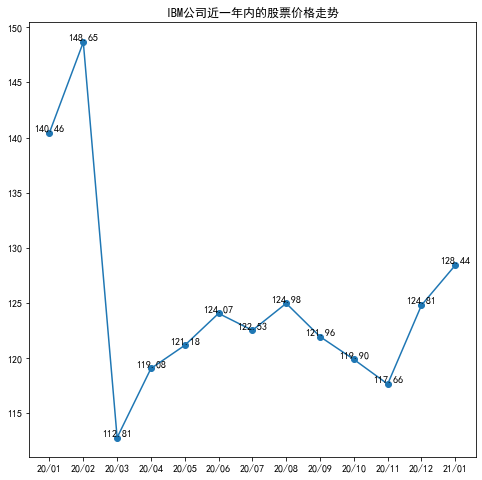

In [9]:
import matplotlib.pyplot as plt
# 将上述数据表示成折线图
x = list(avgPrices.index)
y = avgPrices.values
plt.figure(figsize=(8,8))
plt.plot(x, y,"-o")
# 在图表中加入中文标题的问题
# from matplotlib.font_manager import FontProperties
# myfont = FontProperties(fname=r"//System//Library//Fonts//STHeiti Medium.ttc", size=16)
# plt.title("IBM公司近一年内的价格走势")
# # 为每一个点加上数据标签
plt.rcParams['font.sans-serif']=['SimHei'] #用来正常显示中文标签
plt.title('IBM公司近一年内的股票价格走势')
for a,b in zip(x,y):
    plt.text(a,b,"%.2f"%b,ha='center',va='bottom')
plt.show()